In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('stroke prediction.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


id - Person id 
gender - 
Age  - Age of person in years
hypertension (Blood Presure) - Yes, No
heart_diease - Yes, No
ever_married 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
df["id"].nunique()

43400

In [5]:
df.drop(columns=["id"],inplace=True)

<Axes: xlabel='age', ylabel='Count'>

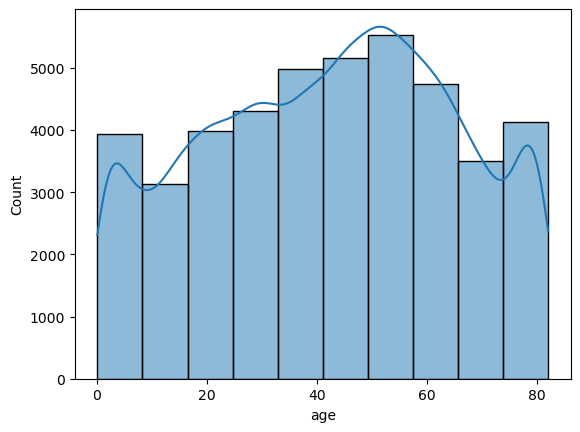

In [6]:
import seaborn as sns

sns.histplot(df["age"],kde=True,bins=10)

In [7]:
df["age"].skew()

-0.10249737146133675

In [8]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [9]:
df['hypertension'].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [10]:
df['heart_disease'].unique()

array([0, 1], dtype=int64)

In [11]:
df['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [13]:
df['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [14]:
df['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [15]:
df['stroke'].unique()

array([0, 1], dtype=int64)

In [16]:
continous= ['age','avg_glucose_level','bmi']

discrete_categorical = ['gender','hypertension','heart_disease',
                        'ever_married','work_type','Residence_type',
                       'smoking_status','stroke']

In [17]:
df["age"].skew()

-0.10249737146133675

In [18]:
df['avg_glucose_level'].skew()

1.6754049014377763

In [19]:
df['bmi'].skew()

0.8987282500249906

In [20]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [21]:
len(df)

43400

In [22]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

**Analyze Stroke & Marriage**

In [23]:
pd.crosstab(df['ever_married'],df['stroke'],margins=True)

stroke,0,1,All
ever_married,,,
No,15382,80,15462
Yes,27235,703,27938
All,42617,783,43400


# Discretization

**Analyze Stroke & Age**

In [24]:
df["age"].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [25]:
child = df[(df["age"]>12) & (df["age"]<=19)]
child

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
35,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,NaN,0
39,Female,17.0,0,0,No,Self-employed,Urban,82.18,23.4,NaN,0
41,Male,13.0,0,0,No,children,Urban,114.84,18.3,NaN,0
43,Female,16.0,0,0,No,children,Rural,110.63,19.5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43337,Male,18.0,0,0,No,Private,Urban,76.25,36.7,NaN,0
43340,Male,13.0,0,0,No,children,Rural,112.90,16.9,NaN,0
43383,Male,18.0,0,0,No,Private,Urban,131.73,24.9,never smoked,0
43389,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0


In [26]:
child["stroke"].value_counts()

stroke
0    3184
1       1
Name: count, dtype: int64

In [27]:
###apply discretization using intervals
df['age_category'] = pd.cut(df['age'], 
                            bins = [0,12,19,30,60,90], 
                            labels= ['child','teenager',"young_adult","middle_aged",'senior_citizen'])

In [28]:
df[['age','age_category']]

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager
...,...,...
43395,10.0,child
43396,56.0,middle_aged
43397,82.0,senior_citizen
43398,40.0,middle_aged


In [29]:
pd.crosstab(df['age_category'],df['stroke'],margins=True)

stroke,0,1,All
age_category,,,
child,5325,1,5326
teenager,3184,1,3185
young_adult,5723,2,5725
middle_aged,18453,200,18653
senior_citizen,9932,579,10511
All,42617,783,43400


## Feature Transformation

In [30]:
df[continous].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


In [31]:
df['age'].skew()

-0.10249737146133675

In [32]:
df['avg_glucose_level'].skew()

1.6754049014377763

In [33]:
df['bmi'].skew()

0.8987282500249906

**Log Transformation**

In [42]:
df['log_agl'] = np.log(df['avg_glucose_level'])
df['log_agl'].skew()

0.9325457821038275

**Root Transformation**

In [53]:
df['root_agl']=df['avg_glucose_level']**(1/12)
df['root_agl'].skew()

0.9983431560256403

**BoxCox**

The Box-Cox transformation is defined as: 

(X**λ − 1)/λ-1

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [65]:
from scipy.stats import boxcox

# transform training data & save lambda value
df['agl_boxcox'], param = boxcox(df['avg_glucose_level'])

In [68]:
df['agl_boxcox'].skew()

0.06694113303235474

In [75]:
param

0.8107251328721137

**Exponential Transformation**

In [72]:
df['exp_age']=np.exp(df['bmi'])
df['exp_age'].skew()

192.50398226708398

**power transformation**

In [73]:
df['pow_bmi']=df['age']**(2)
df['pow_bmi'].skew()

0.651987619140339

**BoxCox**

In [74]:
from scipy.stats import boxcox
df['age_boxcox'], param = boxcox(df['age'])
df['age_boxcox'].skew()

-0.3115789819991526